# **Import**

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from rapidfuzz import fuzz, process  
import plotly.graph_objects as go
import pycountry

# Machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA



# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# **Import dataset**

In [364]:
df = pd.read_csv("salaries.csv")

In [365]:
df.head()

work_year experience_level employment_type       job_title  salary  \
0       2025               EX              FT    Head of Data  348516   
1       2025               EX              FT    Head of Data  232344   
2       2025               SE              FT  Data Scientist  145400   
3       2025               SE              FT  Data Scientist   81600   
4       2025               MI              FT        Engineer  160000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         348516                 US             0   
1             USD         232344                 US             0   
2             USD         145400                 US             0   
3             USD          81600                 US             0   
4             USD         160000                 US           100   

  company_location company_size  
0               US            M  
1               US            M  
2               US            M  
3               US            M  
4               US            M

0 : no remote work, 
50 : Hybrid, 
100 : Full remote

# **Dataset analysis**

In [366]:
# Dimensions
df.shape

(151445, 11)

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [368]:
# Name and types of columns
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [369]:
# Missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [370]:
# Statistics
df.describe()

work_year        salary  salary_in_usd   remote_ratio
count  151445.000000  1.514450e+05  151445.000000  151445.000000
mean     2024.435313  1.628380e+05  157527.458411      20.938625
std         0.671842  2.080124e+05   74150.772377      40.620393
min      2020.000000  1.400000e+04   15000.000000       0.000000
25%      2024.000000  1.060000e+05  105800.000000       0.000000
50%      2025.000000  1.470000e+05  146100.000000       0.000000
75%      2025.000000  1.990000e+05  198000.000000       0.000000
max      2025.000000  3.040000e+07  800000.000000     100.000000

In [371]:
#Column names
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Unique values in each column
df.nunique()

work_year                 6
experience_level          4
employment_type           4
job_title               422
salary                12308
salary_currency          26
salary_in_usd         13580
employee_residence      104
remote_ratio              3
company_location         97
company_size              3
dtype: int64

In [ ]:
# Unique values in 'employee_residence' column
df["employee_residence"].unique()

array(['US', 'CA', 'NL', 'FR', 'GB', 'DE', 'ES', 'IE', 'AU', 'LT', 'IN',
       'EE', 'SK', 'CZ', 'UA', 'FI', 'CO', 'AR', 'AT', 'EG', 'SG', 'MX',
       'IT', 'PL', 'BE', 'CH', 'GR', 'NZ', 'HR', 'PR', 'PT', 'BR', 'PH',
       'RO', 'ML', 'NO', 'CL', 'MY', 'SV', 'DO', 'GT', 'CR', 'LV', 'ZA',
       'JO', 'CY', 'TH', 'JM', 'JP', 'MT', 'MK', 'SI', 'HK', 'LS', 'ID',
       'PE', 'HU', 'PA', 'LU', 'DZ', 'KE', 'CD', 'SE', 'KR', 'TW', 'TR',
       'NG', 'DK', 'AE', 'BG', 'RS', 'EC', 'XK', 'ZM', 'AM', 'RW', 'IL',
       'LB', 'PK', 'HN', 'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG',
       'MU', 'QA', 'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR',
       'AS', 'CN', 'BO', 'IQ', 'JE'], dtype=object)

In [ ]:
# Unique values in 'company_location' column
df["company_location"].unique()

array(['US', 'CA', 'NL', 'FR', 'GB', 'DE', 'ES', 'IE', 'AU', 'LT', 'IN',
       'EE', 'SK', 'CZ', 'UA', 'FI', 'CO', 'AR', 'AT', 'EG', 'SG', 'MX',
       'IT', 'PL', 'BE', 'CH', 'GR', 'NZ', 'HR', 'PR', 'PT', 'BR', 'PH',
       'RO', 'ML', 'NO', 'CL', 'MY', 'SV', 'DO', 'GT', 'CR', 'LV', 'ZA',
       'JO', 'CY', 'TH', 'JM', 'JP', 'MT', 'MK', 'SI', 'HK', 'LS', 'PE',
       'HU', 'PA', 'LU', 'DZ', 'KE', 'CD', 'SE', 'KR', 'TW', 'TR', 'DK',
       'AE', 'BG', 'ID', 'RS', 'EC', 'XK', 'ZM', 'AM', 'IL', 'LB', 'NG',
       'PK', 'HN', 'VE', 'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU',
       'QA', 'GH', 'AD', 'CF', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

In [ ]:
# function to convert ISO-2 country codes into full country names
def iso2_to_country(iso):
    try:
        return pycountry.countries.get(alpha_2=iso).name
    except:
        return None

In [376]:
# Applying the conversion function to the employee_residence and company_location columns
df["employee_residence"] = df["employee_residence"].apply(iso2_to_country)
df["company_location"] = df["company_location"].apply(iso2_to_country)

In [ ]:
# Unique values in 'company_location' column after conversion
df["company_location"].unique()

array(['United States', 'Canada', 'Netherlands', 'France',
       'United Kingdom', 'Germany', 'Spain', 'Ireland', 'Australia',
       'Lithuania', 'India', 'Estonia', 'Slovakia', 'Czechia', 'Ukraine',
       'Finland', 'Colombia', 'Argentina', 'Austria', 'Egypt',
       'Singapore', 'Mexico', 'Italy', 'Poland', 'Belgium', 'Switzerland',
       'Greece', 'New Zealand', 'Croatia', 'Puerto Rico', 'Portugal',
       'Brazil', 'Philippines', 'Romania', 'Mali', 'Norway', 'Chile',
       'Malaysia', 'El Salvador', 'Dominican Republic', 'Guatemala',
       'Costa Rica', 'Latvia', 'South Africa', 'Jordan', 'Cyprus',
       'Thailand', 'Jamaica', 'Japan', 'Malta', 'North Macedonia',
       'Slovenia', 'Hong Kong', 'Lesotho', 'Peru', 'Hungary', 'Panama',
       'Luxembourg', 'Algeria', 'Kenya',
       'Congo, The Democratic Republic of the', 'Sweden',
       'Korea, Republic of', 'Taiwan, Province of China', 'Türkiye',
       'Denmark', 'United Arab Emirates', 'Bulgaria', 'Indonesia',
       'Se

In [ ]:
# Unique values in 'employee_residence' column 
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
# Replace encoded categorical values with more descriptive labels
df.replace({

    'remote_ratio': {
        0: 'On-site',
        50: 'Hybrid',
        100: 'Remote'
    },

    'experience_level': {
        'EN': 'Entry-level / Junior',
        'MI': 'Mid-level / Intermediate',
        'SE': 'Senior-level',
        'EX': 'Executive / Director'
    },
    
    'company_size' : {
        'S' : 'Small', 
        'M' : 'Meduim',
        'L' : 'Large'
    }

}, inplace=True)

In [ ]:
# Display the first few rows of the transformed dataframe
df.head()

work_year          experience_level employment_type       job_title  \
0       2025      Executive / Director              FT    Head of Data   
1       2025      Executive / Director              FT    Head of Data   
2       2025              Senior-level              FT  Data Scientist   
3       2025              Senior-level              FT  Data Scientist   
4       2025  Mid-level / Intermediate              FT        Engineer   

   salary salary_currency  salary_in_usd employee_residence remote_ratio  \
0  348516             USD         348516      United States      On-site   
1  232344             USD         232344      United States      On-site   
2  145400             USD         145400      United States      On-site   
3   81600             USD          81600      United States      On-site   
4  160000             USD         160000      United States       Remote   

  company_location company_size  
0    United States       Meduim  
1    United States       Meduim  
2    United States       Meduim  
3    United States       Meduim  
4    United States       Meduim

# **Visualization**

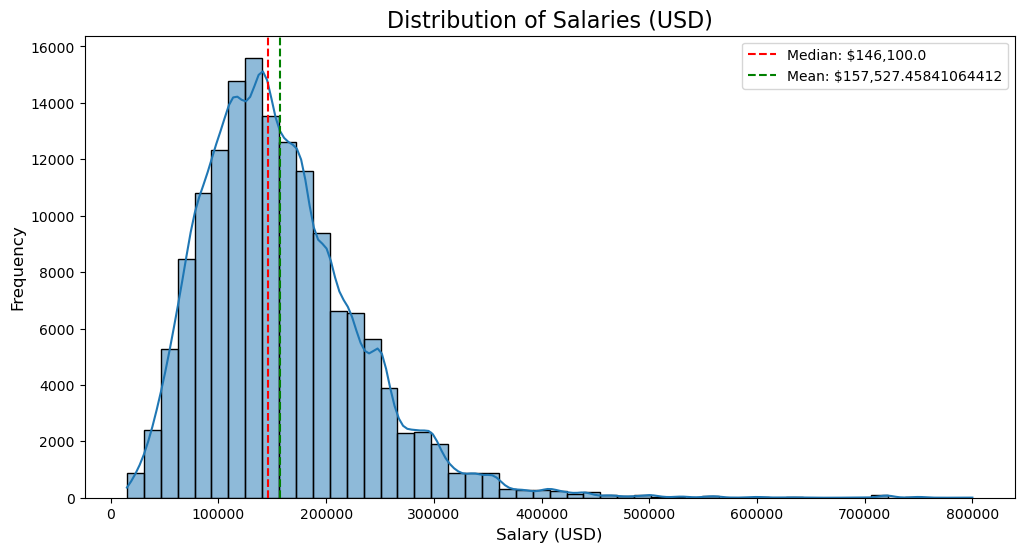

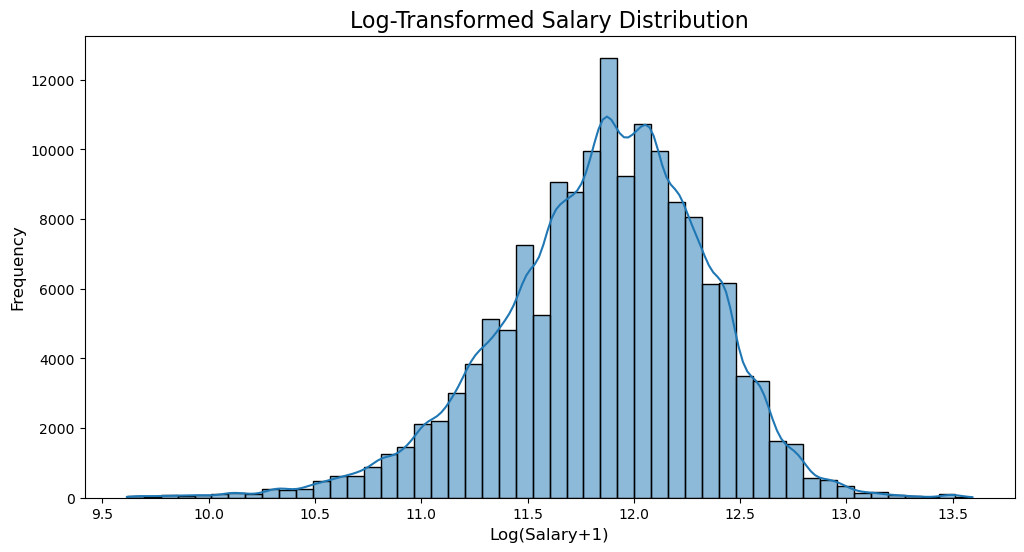

In [381]:
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Distribution of Salaries (USD)', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['salary_in_usd'].median(), color='red', linestyle='--', label=f'Median: ${df["salary_in_usd"].median():,}')
plt.axvline(df['salary_in_usd'].mean(), color='green', linestyle='--', label=f'Mean: ${df["salary_in_usd"].mean():,}')
plt.legend()
plt.show()

# Log-transformed salary distribution (to handle skewness)
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['salary_in_usd']), kde=True, bins=50)
plt.title('Log-Transformed Salary Distribution', fontsize=16)
plt.xlabel('Log(Salary+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Thias graph shows the distribution of salary in usd. The distribution is right-skewed with most salaries clustered between $100,000-$200,000, but high earners create a long tail extending to $800,000. The median ($146,100) is significantly lower than the mean ($157,527), confirming that outliers inflate the average, making the median a more representative measure of typical compensation.

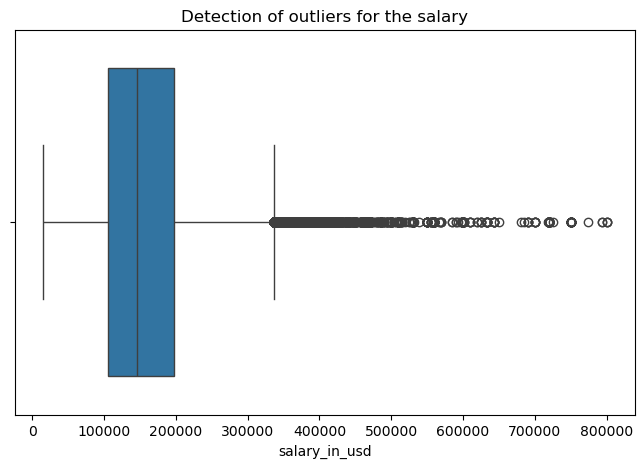

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot for the salary in USD")
plt.show()

As we could see from the salary distribution, this box plot clearly reveals that there are many outliers in the USD salary data.

In [384]:
# Yearly salary trends
yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index()

fig = px.line(yearly_stats, x='work_year', y=['mean', 'median'], 
              title='Data Science Salary Trends (2020-2025)',
              labels={'value': 'Salary (USD)', 'work_year': 'Year', 'variable': 'Metric'},
              template='plotly_white')

fig.update_layout(legend_title_text='', hovermode='x unified',
                 width=900, height=500)

# Add range for standard deviation
fig.add_trace(go.Scatter(
    x=np.concatenate([yearly_stats['work_year'], yearly_stats['work_year'][::-1]]),
    y=np.concatenate([yearly_stats['mean'] + yearly_stats['std'], 
                     (yearly_stats['mean'] - yearly_stats['std'])[::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Standard Deviation'
))

fig.show()

From this graph, we can observe a clear upward trend in data science salaries between 2020 and 2025.
The most significant increase occurs between 2021 and 2022, followed by continuous growth through 2023 and 2024.

Several industry dynamics can explain this acceleration:

- The rapid expansion of artificial intelligence and machine learning, which created a strong demand for skilled profiles.

- The post-pandemic digital transformation, which pushed companies to invest massively in data, analytics, and automation.

- The emergence of new AI technologies, which increased the value and scarcity of experienced talent.

In 2025, salaries stabilize slightly, suggesting a market that is still growing but becoming more structured after several years of intense acceleration.

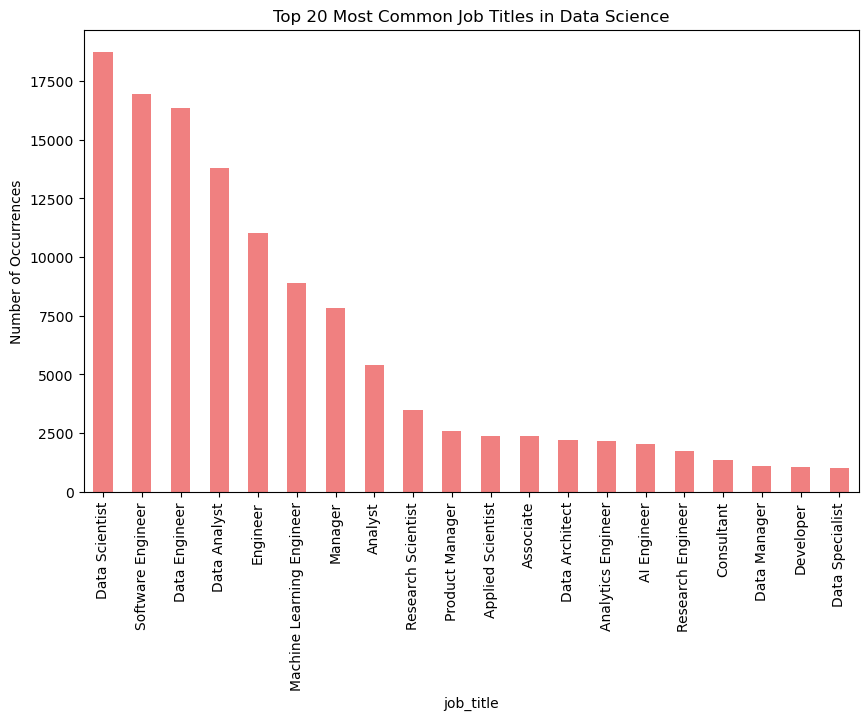

In [385]:
plt.figure(figsize=(10, 6))
df['job_title'].value_counts().head(20).plot(kind='bar', color='lightcoral')
plt.title("Top 20 Most Common Job Titles in Data Science")
plt.ylabel("Number of Occurrences")
plt.show()

This graph shows the top 20 most common jobs in the dataset. The dataset has over 400 different job titles, which reflects the real complexity of the field. Data Scientist dominates with 17,500 occurrences, followed by Senior Data Engineer (16,000) and Data Engineer (15,500).

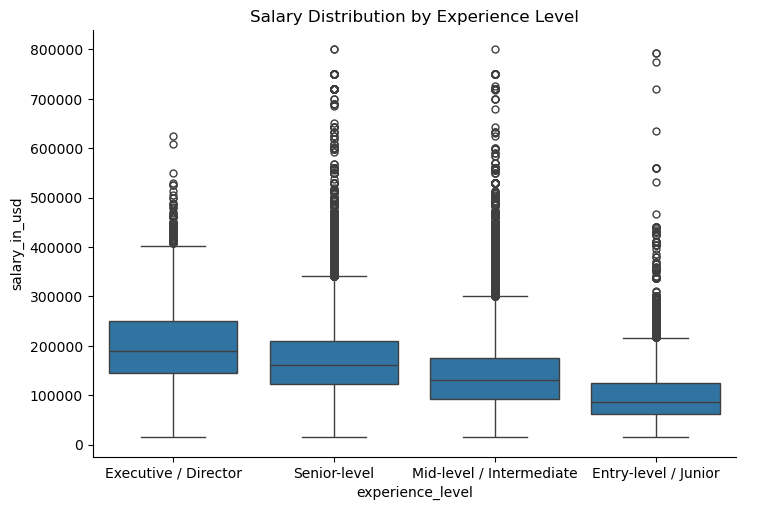

In [386]:
sns.catplot(data=df, x="experience_level", y="salary_in_usd", kind="box", height=5, aspect=1.5)
plt.title("Salary Distribution by Experience Level")
plt.show()

Experience level is strongly linked to salary. This graph shows a clear hierarchy: entry-level positions earn 70,000-100,000 USD, mid-level 140,000-160,000 USD, senior 170,000 USD, and executives 200,000 USD. This logical progression validates experience level as a strong salary predictor.

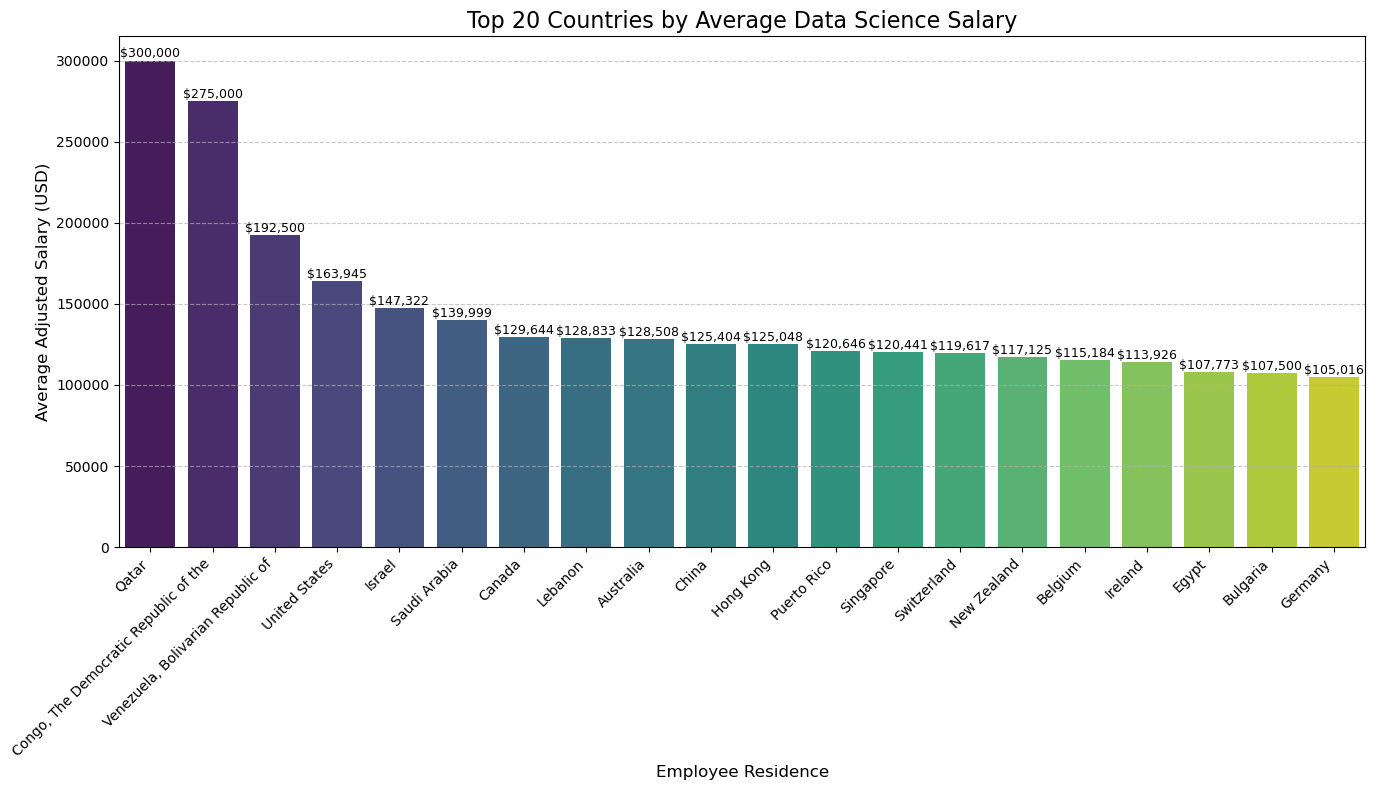

In [387]:
# 1) Compute the average salary per country (based on employee residence)
avg_salary_by_residence = (
    df.groupby('employee_residence')['salary_in_usd']
      .mean()
      .reset_index()
)

# Rename the column for clarity and compatibility with Plotly
avg_salary_by_residence = avg_salary_by_residence.rename(
    columns={'employee_residence': 'country_name'}
)

# 2) Choropleth map of average salary by country
fig2 = px.choropleth(
    avg_salary_by_residence,
    locations='country_name',            # plotly accepts full country names
    locationmode='country names',
    color='salary_in_usd',
    hover_name='country_name',
    hover_data={'salary_in_usd': ':,.0f'},
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Average Salary by Employee Residence',
    labels={'salary_in_usd': 'Average Adjusted Salary'},
    projection='natural earth'
)

fig2.update_layout(width=1000, height=600)
fig2.show()

# 3) Barplot of the Top 20 highest-paying countries
top_countries = avg_salary_by_residence.sort_values(
    'salary_in_usd', ascending=False
).head(20)

plt.figure(figsize=(14, 8))

chart = sns.barplot(
    x='country_name',
    y='salary_in_usd',
    data=top_countries,
    palette='viridis',
    order=top_countries['country_name']
)

plt.title('Top 20 Countries by Average Data Science Salary', fontsize=16)
plt.xlabel('Employee Residence', fontsize=12)
plt.ylabel('Average Adjusted Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add salary values above the bars
for i, bar in enumerate(chart.patches):
    chart.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height() + 2000,   # slight offset for visibility
        f'${top_countries["salary_in_usd"].iloc[i]:,.0f}',
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()



This choropleth map highlights strong geographical disparities in salaries.
North America (United States, Canada) shows the highest average salaries, followed by Western Europe and Australia.
Eastern Europe and South America display lower compensation levels.
This confirms that salary strongly depends on the country of residence and justifies including employee_residence and company_location as important predictive features in the model.
On the map, we can see that Congo and Venezuela are very well paid, but there are only two. Maybe this is due to high diversity.

The bar chart shows that several countries ranking high before the United States, such as Qatar, Congo, and Venezuela. But the issues is that they are represented by only 2 employees each, making their average salaries statistically unreliable and skewing the analysis. To ensure more robust findings, these outlier countries with minimal data representation should be consolidated into an "Other" category. This consolidation will improve the validity of the salary comparison and prevent misleading conclusions based on non-representative samples, allowing focus on countries with sufficient employee data for meaningful insights.

In [ ]:
# Display rows where employee_residence is 'Congo, The Democratic Republic of the'
df[df['employee_residence'] == 'Congo, The Democratic Republic of the']

work_year      experience_level employment_type job_title  salary  \
30440       2025  Executive / Director              FT  Engineer  300000   
30441       2025  Executive / Director              FT  Engineer  250000   

      salary_currency  salary_in_usd                     employee_residence  \
30440             USD         300000  Congo, The Democratic Republic of the   
30441             USD         250000  Congo, The Democratic Republic of the   

      remote_ratio                       company_location company_size  
30440      On-site  Congo, The Democratic Republic of the       Meduim  
30441      On-site  Congo, The Democratic Republic of the       Meduim

In [ ]:
# Display rows where employee_residence is 'Venezuela, Bolivarian Republic of'
df[df['employee_residence'] == 'Venezuela, Bolivarian Republic of']

work_year          experience_level employment_type  job_title  \
123683       2024  Mid-level / Intermediate              FT  Associate   
123684       2024  Mid-level / Intermediate              FT  Associate   

        salary salary_currency  salary_in_usd  \
123683  221000             USD         221000   
123684  164000             USD         164000   

                       employee_residence remote_ratio  \
123683  Venezuela, Bolivarian Republic of      On-site   
123684  Venezuela, Bolivarian Republic of      On-site   

                         company_location company_size  
123683  Venezuela, Bolivarian Republic of       Meduim  
123684  Venezuela, Bolivarian Republic of       Meduim

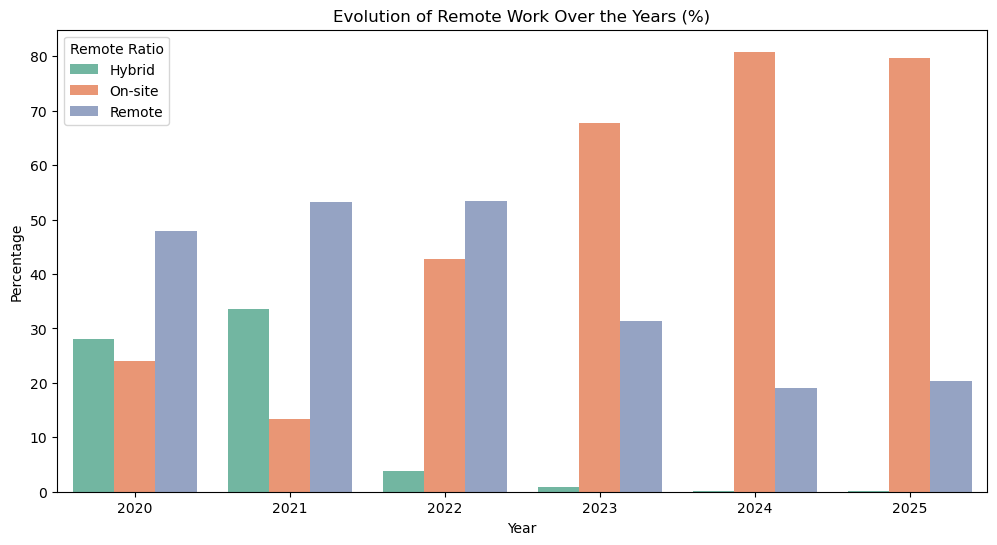

In [390]:
# Compute the distribution of remote work ratio for each year
remote_year = (
    df.groupby(['work_year', 'remote_ratio'])
      .size()
      .reset_index(name='count')
)

# Normalize counts into percentages within each year
remote_year['percent'] = remote_year.groupby('work_year')['count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(12,6))
sns.barplot(
    data=remote_year,
    x="work_year",
    y="percent",
    hue="remote_ratio",
    palette="Set2"
)

plt.title("Evolution of Remote Work Over the Years (%)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend(title="Remote Ratio")
plt.show()


This barplot clearly highlights the evolution of work modes over the years and reveals a strong shift toward on-site work.

Between 2020 and 2022, the distribution between remote, hybrid, and on-site work reflects the strong influence of the Covid-19 pandemic and the lockdown periods. During these years, remote and hybrid arrangements remain widely adopted as companies adapt to health restrictions and the sudden need for operational continuity outside traditional offices.

However, starting in 2023, once the effects of the pandemic fade and most restrictions are lifted, we observe a sharp resurgence of on-site work. This return intensifies in 2024 and 2025, where on-site work becomes overwhelmingly dominant, while remote work declines significantly and hybrid work almost disappears. This suggests that many companies progressively reverted to pre-pandemic habits, reinstating physical presence as the standard mode of operation. However, we still observe that around 20% of workers remain fully remote, a proportion that is likely a long-term consequence of the pandemic. It would have been particularly interesting to have data from before the lockdown period to quantify how much the pandemic transformed working habits and to compare the pre- and post-Covid distribution.

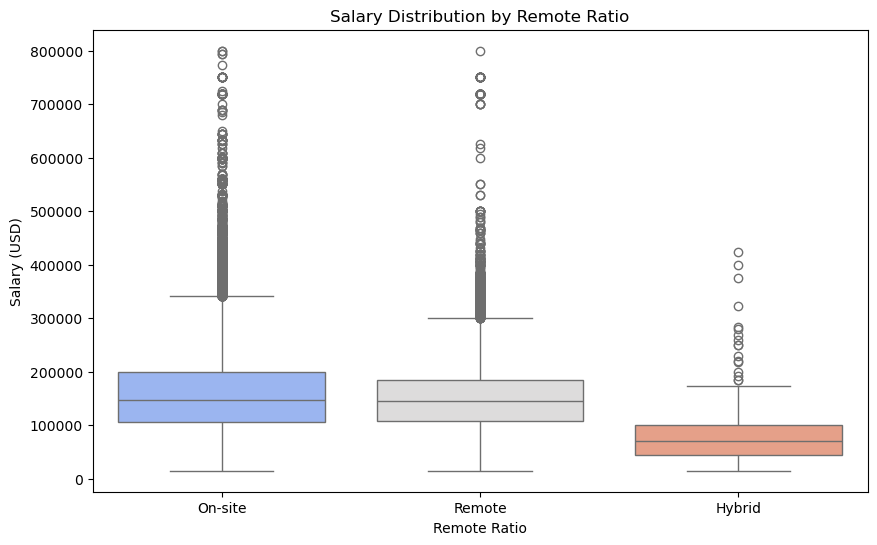

In [391]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="remote_ratio",
    y="salary_in_usd",
    palette="coolwarm"
)

plt.title("Salary Distribution by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary (USD)")
plt.show()


These boxplots show that salary levels differ depending on the remote ratio. On-site and fully remote employees display similar salary distributions, while hybrid workers earn noticeably less. This lower salary level is likely explained by the fact that hybrid workers are almost entirely absent from the dataset after 2023, a period during which salaries increased significantly as observed in the graphs ealier. As a result, hybrid workers do not benefit from the recent salary growth, which naturally lowers their overall median salary compared to the two other groups.

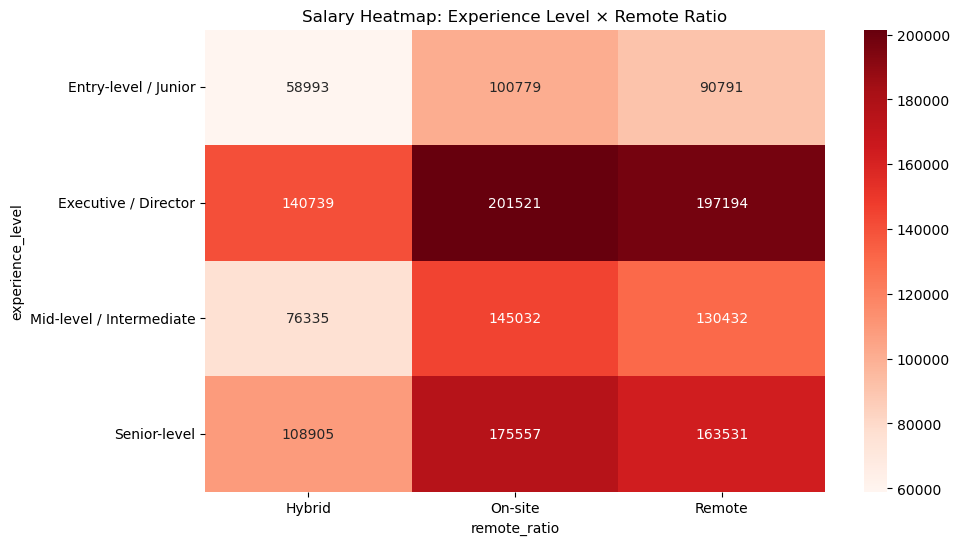

In [392]:
pivot_remote_exp = df.pivot_table(
    values="salary_in_usd",
    index="experience_level",
    columns="remote_ratio",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_remote_exp, cmap="Reds", annot=True, fmt=".0f")
plt.title("Salary Heatmap: Experience Level × Remote Ratio")
plt.show()


Experience level is the strongest salary driver, with executives earning 3-4x more than entry-level employees. On-site and remote positions consistently outpay hybrid arrangements across all levels, with the gap widest at entry-level and narrowing slightly at executive level. Hybrid roles are systematically undercompensated, suggesting employers use this arrangement as a cost-reduction strategy.

In [393]:
df_diff = df[df["employee_residence"] != df["company_location"]]
countries_with_non_local_employees = df_diff["company_location"].unique()
countries_with_non_local_employees
df_diff[["employee_residence", "company_location"]]
non_local_counts = df_diff["company_location"].value_counts()
non_local_counts



company_location
United States                            70
Germany                                  15
United Kingdom                           10
Australia                                 7
Canada                                    6
France                                    4
American Samoa                            4
Poland                                    3
Russian Federation                        3
Luxembourg                                2
Israel                                    2
Denmark                                   2
Czechia                                   2
Netherlands                               2
Spain                                     2
India                                     1
Bahamas                                   1
Indonesia                                 1
Mexico                                    1
Malaysia                                  1
Romania                                   1
Pakistan                                  1
Singapore      

In [ ]:
# Number of employees working in a different country than their company's location
print((df['company_location'] != df['employee_residence']).sum())

159


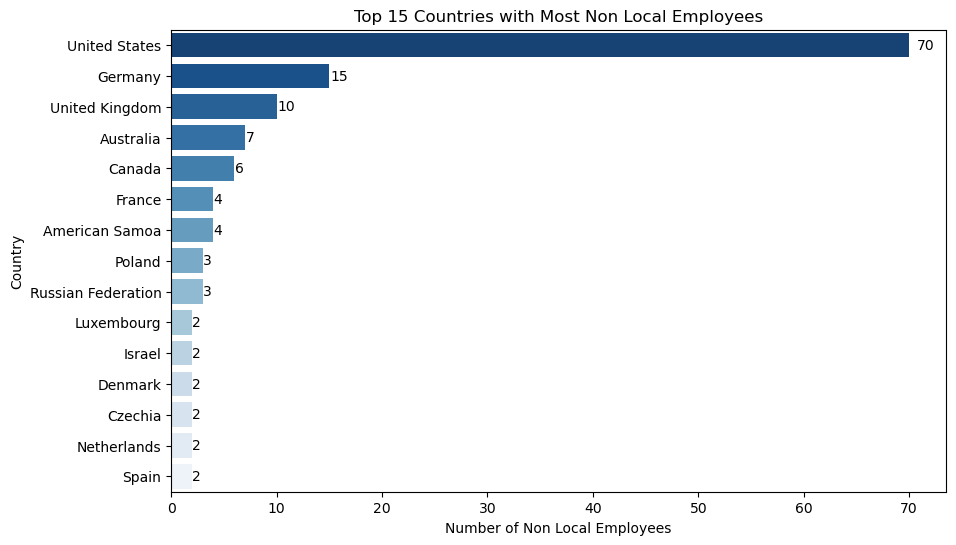

In [395]:
top_non_local = non_local_counts.head(15)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_non_local.values, 
    y=top_non_local.index, 
    palette="Blues_r"
)

plt.title("Top 15 Countries with Most Non Local Employees")
plt.xlabel("Number of Non Local Employees")
plt.ylabel("Country")

for i, v in enumerate(top_non_local.values):
    ax.text(
        v + (v * 0.01),      
        i,                   
        f"{v:,}",            
        color="black",
        va="center",
        fontsize=10
    )

plt.show()


In [ ]:
df_same = df[df["employee_residence"] == df["company_location"]]
countries_with_local_employees = df_same["company_location"].unique()
local_counts = df_same["company_location"].value_counts()
local_counts

company_location
United States                135499
Canada                         6202
United Kingdom                 4171
Australia                       588
Netherlands                     480
                              ...  
Qatar                             1
Andorra                           1
Iran, Islamic Republic of         1
Iraq                              1
Moldova, Republic of              1
Name: count, Length: 92, dtype: int64

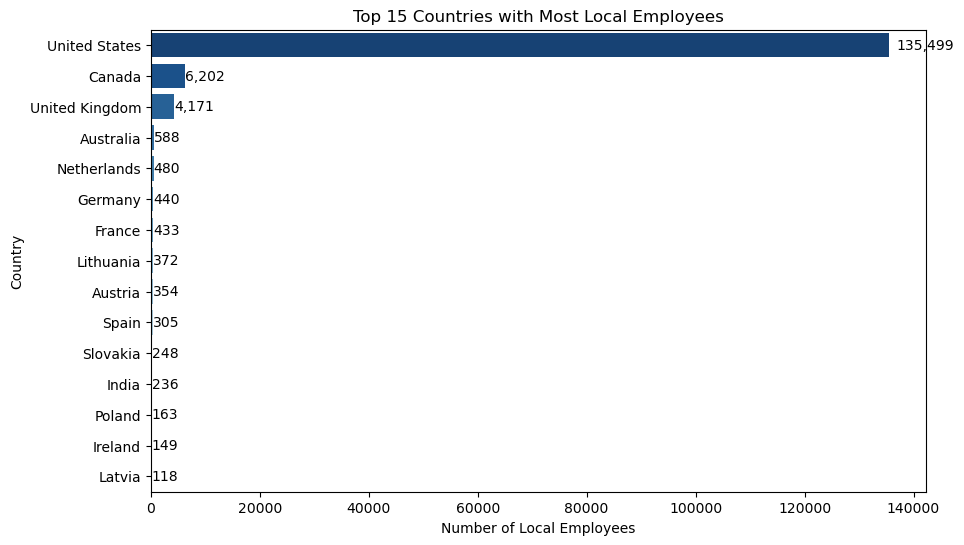

In [ ]:
top_local = local_counts.head(15)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_local.values, 
    y=top_local.index, 
    palette="Blues_r"
)

plt.title("Top 15 Countries with Most Local Employees")
plt.xlabel("Number of Local Employees")
plt.ylabel("Country")

for i, v in enumerate(top_local.values):
    ax.text(
        v + (v * 0.01),      
        i,                   
        f"{v:,}",            
        color="black",
        va="center",
        fontsize=10
    )

plt.show()

These charts show that employees almost always work in their company's home country. The United States has 135,499 local employees but only 70 non-local workers, which means very few people work abroad. Canada and the United Kingdom show the same pattern—most employees work locally. Since only 150 records differ between employee and company locations, this proves that companies rarely hire international workers. The data indicates that organizations prefer to hire locally rather than build globally distributed teams, showing limited international recruitment practices.

In [398]:
# Salary by company size
company_salary = df.groupby(['company_size', 'experience_level'])['salary_in_usd'].median().reset_index()


fig = px.bar(company_salary, x='company_size', y='salary_in_usd', color='experience_level',
            barmode='group', title='Median Salary by Company Size and Experience Level',
            labels={'salary_in_usd': 'Median Salary (USD)', 'company_size': 'Company Size'},
            template='plotly_white')

fig.update_layout(width=900, height=500)
fig.show()

This chart highlights two important insights about how salary varies with both experience level and company size.

First, experience remains a strong driver of compensation, but not always in a strictly linear way. In large companies, Senior-level employees actually earn a slightly higher median salary than Executive/Director-level employees, suggesting that senior technical or specialist roles may be valued more highly than upper management positions. In medium and small companies, however, Executive/Director roles remain the highest paid.

Second, company size also influences salary patterns. Medium-sized companies offer the highest median salary for executives, while large companies tend to pay more for senior profiles. Small companies consistently offer the lowest median salaries across all experience levels.

Overall, the graph shows that salary dynamics depend on both company size and experience, but the relationship is not strictly hierarchical: the highest experience level does not always correspond to the highest pay, especially in large companies.

In [399]:
fig = px.box(
    df,
    x='company_size',
    y='salary_in_usd',
    color='experience_level',
    title='Salary Inequality by Company Size and Experience Level',
    labels={'salary_in_usd': 'Salary (USD)', 'company_size': 'Company Size'},
    template='plotly_white'
)

fig.update_layout(width=900, height=500)
fig.show()


This chart reveals strong inequalities in salary distribution across both company size and experience level. While experience generally increases compensation, the spread of salaries within each category varies widely. Medium-sized companies show the highest level of inequality, with very large salary ranges and numerous outliers, particularly for senior and executive profiles. Large companies display similar patterns but with a slightly more contained variance, whereas small companies have the most homogeneous and compressed salary distributions.

Experience does not always translate into a strictly linear hierarchy of pay. In large companies, for example, Senior-level employees sometimes earn more than Executives/Directors, suggesting that highly specialized or technical roles may be valued above managerial positions. In medium-sized companies, Executive/Director roles remain the highest paid on average, while small companies consistently offer lower and less variable salaries across all experience levels.

Overall, the boxplot highlights that salary dynamics are shaped not only by experience, but also by the size of the company and the level of inequality within each group. Medium companies exhibit the greatest internal disparities, large companies show moderate inequality, and small companies remain the most uniform in their salary structure.

In [400]:
company_counts = df['company_size'].value_counts().rename_axis('company_size').reset_index(name='count')
fig = px.bar(
    company_counts,
    x='company_size',
    y='count',
    text='count',
    title='Number of Companies by Size',
    labels={'company_size': 'Company Size', 'count': 'Number of Companies'},
    template='plotly_white'
)

fig.update_traces(textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

 This barplot reveals a very strong imbalance in the distribution of company sizes within the dataset. Medium-sized companies are overwhelmingly dominant, representing the vast majority of observations. Large companies are present but in much smaller proportions, while small companies are extremely underrepresented.

Such a distribution is important to acknowledge because it directly affects the reliability of subsequent salary comparisons. Insights derived from Medium companies are statistically robust due to their large representation, while those based on Large companies remain acceptable but more limited. However, conclusions regarding Small companies should be interpreted with caution given their very small sample size.

# **Duplicates**

In [401]:
df.duplicated().any()

np.True_

In [402]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(79532)

In [403]:
df = df.drop_duplicates()

In [404]:
df.shape

(71913, 11)

Almost half of the dataset was duplicated, so we removed those rows

# **Outliers**

In [405]:
z_scores = stats.zscore(df['salary_in_usd'])

df = df[abs(z_scores) < 3]  

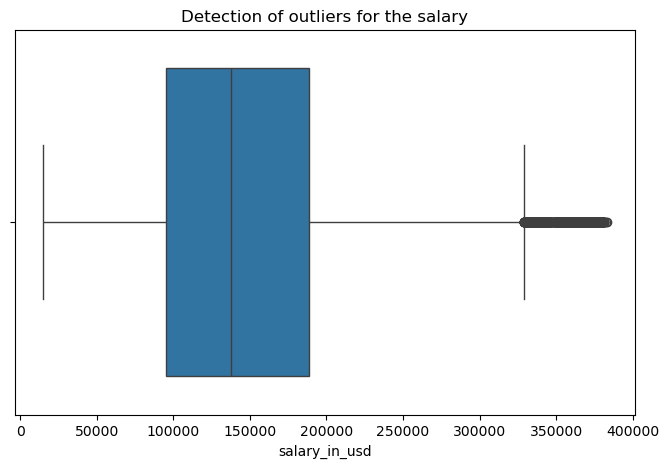

In [406]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Detection of outliers for the salary")
plt.show()

This box plot demonstrates the result after removing outliers from the salary data. The blue box now shows a compressed distribution between approximately $100,000 and $170,000, representing the clean dataset without extreme values. The black dots on the right represent the outliers that were identified and removed from the analysis, which previously extended to $800 000. By eliminating these high-earning outliers, the distribution becomes more representative of typical salaries, removing the right-skew we observed earlier. This cleaner dataset allows for more reliable statistical analysis and better reflects the salary pattern of the majority of employees. We decided to keep some balck points because we think that those salary are realistic.

In [407]:
df.shape

(71106, 11)

# **Feature Engineering** 

In [409]:
(df['company_location'] == df['employee_residence']).mean() * 100


np.float64(99.77779652912552)

In [ ]:
df = df[df['company_location'] == df['employee_residence']]

df['country'] = df['company_location']

df = df.drop(columns=['company_location', 'employee_residence'])

After the graph representing the numbers of non local employees, as said before there was a negligeable amount of people not living in the same country as compagny location, therefor we computed the correlation between 'company_location' and 'employee_residence'. The result is 99.895%, so we decided to created a new column, named 'country' where we keep the countries that kept only 10 different countries. That we can see above.

In [411]:
coutry_counts = df['country'].value_counts() 
rare_countries = coutry_counts[coutry_counts < 200].index

df['country'] = df['country'].replace(rare_countries, 'Other')
df['country'].value_counts()

country
United States     59338
Canada             4553
United Kingdom     2782
Other              1957
Australia           501
Netherlands         395
Germany             385
Lithuania           312
France              298
Spain               221
India               206
Name: count, dtype: int64

Also as said before, we realised that there was over 103 countries represented in this dataset, but most of them are not represented so you decided to created a category 'other' where we store all the countries where there is less then 200 hundred person. 

In [412]:
df = df.drop(columns = 'salary')

It is important to remove salary from the dataset because it is represent a possible dataleak for the furtur predictions 

# **Encoding**

In [413]:
df['experience_level'] = df['experience_level'].map({
    'Entry-level / Junior': 1,  # Entry-level / Junior
    'Mid-level / Intermediate': 2,  # Mid-level / Intermediate
    'Senior-level': 3,  # Senior-level
    'Executive / Director': 4   # Executive / Director
})

In [414]:
df.head()

work_year  experience_level employment_type       job_title  \
0       2025                 4              FT    Head of Data   
1       2025                 4              FT    Head of Data   
2       2025                 3              FT  Data Scientist   
3       2025                 3              FT  Data Scientist   
4       2025                 2              FT        Engineer   

  salary_currency  salary_in_usd remote_ratio company_size        country  
0             USD         348516      On-site       Meduim  United States  
1             USD         232344      On-site       Meduim  United States  
2             USD         145400      On-site       Meduim  United States  
3             USD          81600      On-site       Meduim  United States  
4             USD         160000       Remote       Meduim  United States

In [415]:
df['company_size'] = df['company_size'].map({
    'Small': 1,  # Small (1–50 employees)
    'Meduim': 2,  # Medium (51–500 employees)
    'Large': 3   # Large (501+ employees)
})

In [416]:
df.head()

work_year  experience_level employment_type       job_title  \
0       2025                 4              FT    Head of Data   
1       2025                 4              FT    Head of Data   
2       2025                 3              FT  Data Scientist   
3       2025                 3              FT  Data Scientist   
4       2025                 2              FT        Engineer   

  salary_currency  salary_in_usd remote_ratio  company_size        country  
0             USD         348516      On-site             2  United States  
1             USD         232344      On-site             2  United States  
2             USD         145400      On-site             2  United States  
3             USD          81600      On-site             2  United States  
4             USD         160000       Remote             2  United States

In [417]:
job_counts = df['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]
print(rare_jobs)

                             job_title  count
225          Data Integrity Specialist      9
226           Principal Data Scientist      9
227                      Web Developer      9
228        Data Visualization Designer      9
229                         Copywriter      9
..                                 ...    ...
412      Quantitative Research Analyst      1
413  Safety Data Management Specialist      1
414                    Data Engineer 4      1
415           Marketing Data Scientist      1
416              Data Scientist Expert      1

[192 rows x 2 columns]


In [418]:
top_jobs = (df['job_title'].value_counts().head(15).index.tolist())
top_jobs

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Software Engineer',
 'Engineer',
 'Manager',
 'Machine Learning Engineer',
 'Analyst',
 'Research Scientist',
 'Analytics Engineer',
 'Product Manager',
 'Associate',
 'Data Architect',
 'AI Engineer',
 'Research Engineer']

In [419]:
top_jobs = (df['job_title'].value_counts().head(30).index.tolist())

def normalize_job(title):
    match, score, _ = process.extractOne(title, top_jobs, scorer=fuzz.token_sort_ratio)
    if score >= 10:  
        return match
    else:
        return title  


df['job_title_clean'] = df['job_title'].apply(normalize_job)

job_counts = df['job_title_clean'].value_counts().reset_index()
job_counts.columns = ['job_title_clean', 'count']

rare_jobs = job_counts[job_counts['count'] < 10]

print(rare_jobs)

df['job_title_clean'].nunique()

Empty DataFrame
Columns: [job_title_clean, count]
Index: []


30

This code first identifies the 30 most frequent job titles and uses them as a reference list. Then, it defines a `normalize_job` function that uses fuzzy matching to map similar job titles to the closest frequent one, creating a cleaned column `job_title_clean`. After that, it counts how often each cleaned job title appears, flags rare jobs with fewer than 10 occurrences, and finally checks how many unique job titles remain after normalization.

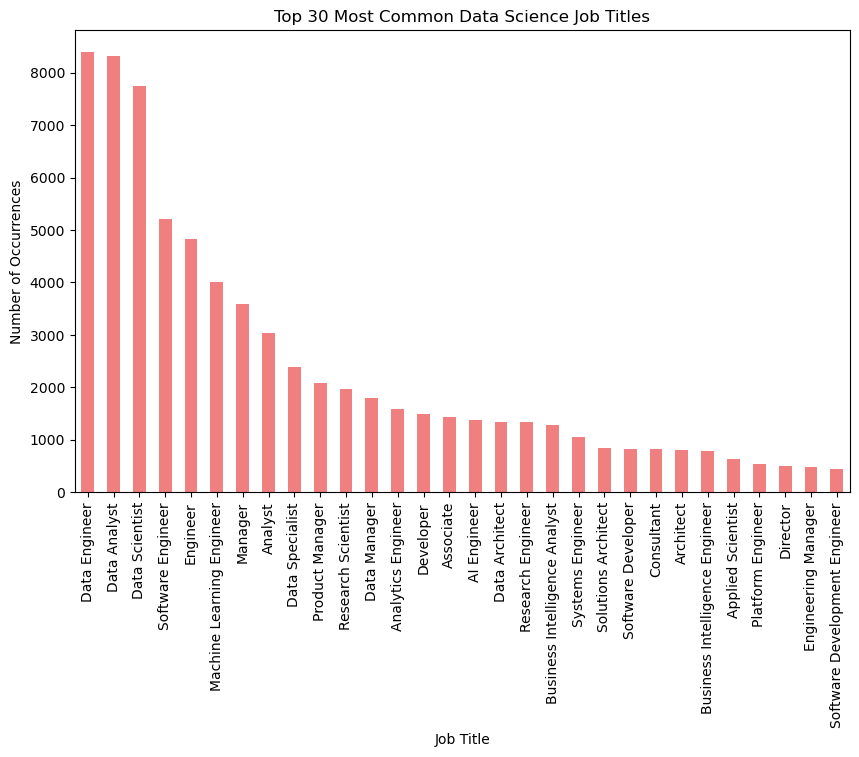

In [420]:
plt.figure(figsize=(10, 6))
df['job_title_clean'].value_counts().head(30).plot(kind='bar', color='lightcoral')
plt.title("Top 30 Most Common Data Science Job Titles")
plt.ylabel("Number of Occurrences")
plt.xlabel("Job Title")
plt.show()

To simplify the dataset, we normalized all job titles using fuzzy matching against the top 30 most common job titles. Any job title with a similarity score above 10 was matched to the closest title in our top 30 list, while others kept their original name. We then removed rare job titles that appeared fewer than 10 times. This reduced the initial 400+ unique titles down to exactly 30 standardized job titles, making the data simpler to work with and improving model performance.

In [421]:
job_counts = df['job_title'].value_counts()

df = df[df['job_title'].isin(job_counts[job_counts >= 10].index)]

In [422]:
df['job_title_clean'].nunique()

30

In [423]:
df['salary_currency'].nunique()

24

In [424]:
df['country'].nunique()

11

In [425]:
df = df.drop(columns=['job_title'])

In [426]:
df.shape

(70302, 9)

In [427]:
df.dtypes

work_year            int64
experience_level     int64
employment_type     object
salary_currency     object
salary_in_usd        int64
remote_ratio        object
company_size         int64
country             object
job_title_clean     object
dtype: object

Here, we do one-hot encoding to transforms categorical variables into numerical format by creating binary columns for each category. This makes categorical data compatible with machine learning algorithms while preserving the information about which category each observation belongs to.

In [428]:
cols_to_dummy = [
    'remote_ratio',
    'job_title_clean',
    'country',
    'salary_currency',
    'employment_type'
]

df = pd.get_dummies(df, columns=cols_to_dummy, drop_first=True)
df = df.astype(int)

In [429]:
df.head(20)

work_year  experience_level  salary_in_usd  company_size  \
0        2025                 4         348516             2   
1        2025                 4         232344             2   
2        2025                 3         145400             2   
3        2025                 3          81600             2   
4        2025                 2         160000             2   
5        2025                 2         140000             2   
8        2025                 3          97900             2   
9        2025                 3          89900             2   
10       2025                 3         180500             2   
11       2025                 3         113000             2   
12       2025                 3         230000             2   
13       2025                 3         121000             2   
20       2025                 3         250000             2   
21       2025                 3         220000             2   
22       2025                 2         200000             2   
23       2025                 2         145000             2   
24       2025                 2         265000             2   
25       2025                 2         175000             2   
26       2025                 4         219800             2   
27       2025                 4         179500             2   

    remote_ratio_On-site  remote_ratio_Remote  job_title_clean_Analyst  \
0                      1                    0                        0   
1                      1                    0                        0   
2                      1                    0                        0   
3                      1                    0                        0   
4                      0                    1                        0   
5                      0                    1                        0   
8                      0                    1                        0   
9                      0                    1                        0   
10                     1                    0                        0   
11                     1                    0                        0   
12                     1                    0                        0   
13                     1                    0                        0   
20                     1                    0                        0   
21                     1                    0                        0   
22                     1                    0                        0   
23                     1                    0                        0   
24                     0                    1                        0   
25                     0                    1                        0   
26                     0                    1                        0   
27                     0                    1                        0   

    job_title_clean_Analytics Engineer  job_title_clean_Applied Scientist  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
5                                    0                                  0   
8                                    0                                  0   
9                                    0                                  0   
10                                   0                                  0   
11                                   0                                  0   
12                                   0                                  0   
13                                   0                                  0   
20                                   0                                  0   
21                        

In [430]:
df.describe()

work_year  experience_level  salary_in_usd  company_size  \
count  70302.000000      70302.000000   70302.000000  70302.000000   
mean    2024.429703          2.491096  147844.643666      2.017837   
std        0.709112          0.741278   68591.335515      0.147892   
min     2020.000000          1.000000   15000.000000      1.000000   
25%     2024.000000          2.000000   96000.000000      2.000000   
50%     2025.000000          3.000000  138000.000000      2.000000   
75%     2025.000000          3.000000  189000.000000      2.000000   
max     2025.000000          4.000000  383000.000000      3.000000   

       remote_ratio_On-site  remote_ratio_Remote  job_title_clean_Analyst  \
count          70302.000000         70302.000000             70302.000000   
mean               0.753336             0.243421                 0.043100   
std                0.431073             0.429150                 0.203083   
min                0.000000             0.000000                 0.000000   
25%                1.000000             0.000000                 0.000000   
50%                1.000000             0.000000                 0.000000   
75%                1.000000             0.000000                 0.000000   
max                1.000000             1.000000                 1.000000   

       job_title_clean_Analytics Engineer  job_title_clean_Applied Scientist  \
count                        70302.000000                       70302.000000   
mean                             0.022418                           0.008549   
std                              0.148038                           0.092064   
min                              0.000000                           0.000000   
25%                              0.000000                           0.000000   
50%                              0.000000                           0.000000   
75%                              0.000000                           0.000000   
max                              1.000000                           1.000000   

       job_title_clean_Architect  ...  salary_currency_PLN  \
count               70302.000000  ...         70302.000000   
mean                    0.011294  ...             0.001252   
std                     0.105673  ...             0.035358   
min                     0.000000  ...             0.000000   
25%                     0.000000  ...             0.000000   
50%                     0.000000  ...             0.000000   
75%                     0.000000  ...             0.000000   
max                     1.000000  ...             1.000000   

       salary_currency_SGD  salary_currency_THB  salary_currency_TRY  \
count         70302.000000         70302.000000         70302.000000   
mean              0.000156             0.000028             0.000057   
std               0.012508             0.005334             0.007543   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       salary_currency_TWD  salary_currency_USD  salary_currency_ZAR  \
count         70302.000000         70302.000000         70302.000000   
mean              0.000185             0.918352             0.000071   
std               0.013597             0.273829             0.008433   
min               0.000000             0.000000             0.000000   
25%               0.000000             1.000000             0.000000   
50%               0.000000             1.000000             0.000000   
75%               0.000000             1.000000             0.000000   
max               1.000000             1.000000             1.000000   

       employment_type_FL  employment_type_FT  employment_type_PT  
count        70302.000000        70302.

In [431]:
print(df.columns)

Index(['work_year', 'experience_level', 'salary_in_usd', 'company_size',
       'remote_ratio_On-site', 'remote_ratio_Remote',
       'job_title_clean_Analyst', 'job_title_clean_Analytics Engineer',
       'job_title_clean_Applied Scientist', 'job_title_clean_Architect',
       'job_title_clean_Associate',
       'job_title_clean_Business Intelligence Analyst',
       'job_title_clean_Business Intelligence Engineer',
       'job_title_clean_Consultant', 'job_title_clean_Data Analyst',
       'job_title_clean_Data Architect', 'job_title_clean_Data Engineer',
       'job_title_clean_Data Manager', 'job_title_clean_Data Scientist',
       'job_title_clean_Data Specialist', 'job_title_clean_Developer',
       'job_title_clean_Director', 'job_title_clean_Engineer',
       'job_title_clean_Engineering Manager',
       'job_title_clean_Machine Learning Engineer', 'job_title_clean_Manager',
       'job_title_clean_Platform Engineer', 'job_title_clean_Product Manager',
       'job_title_clean_R

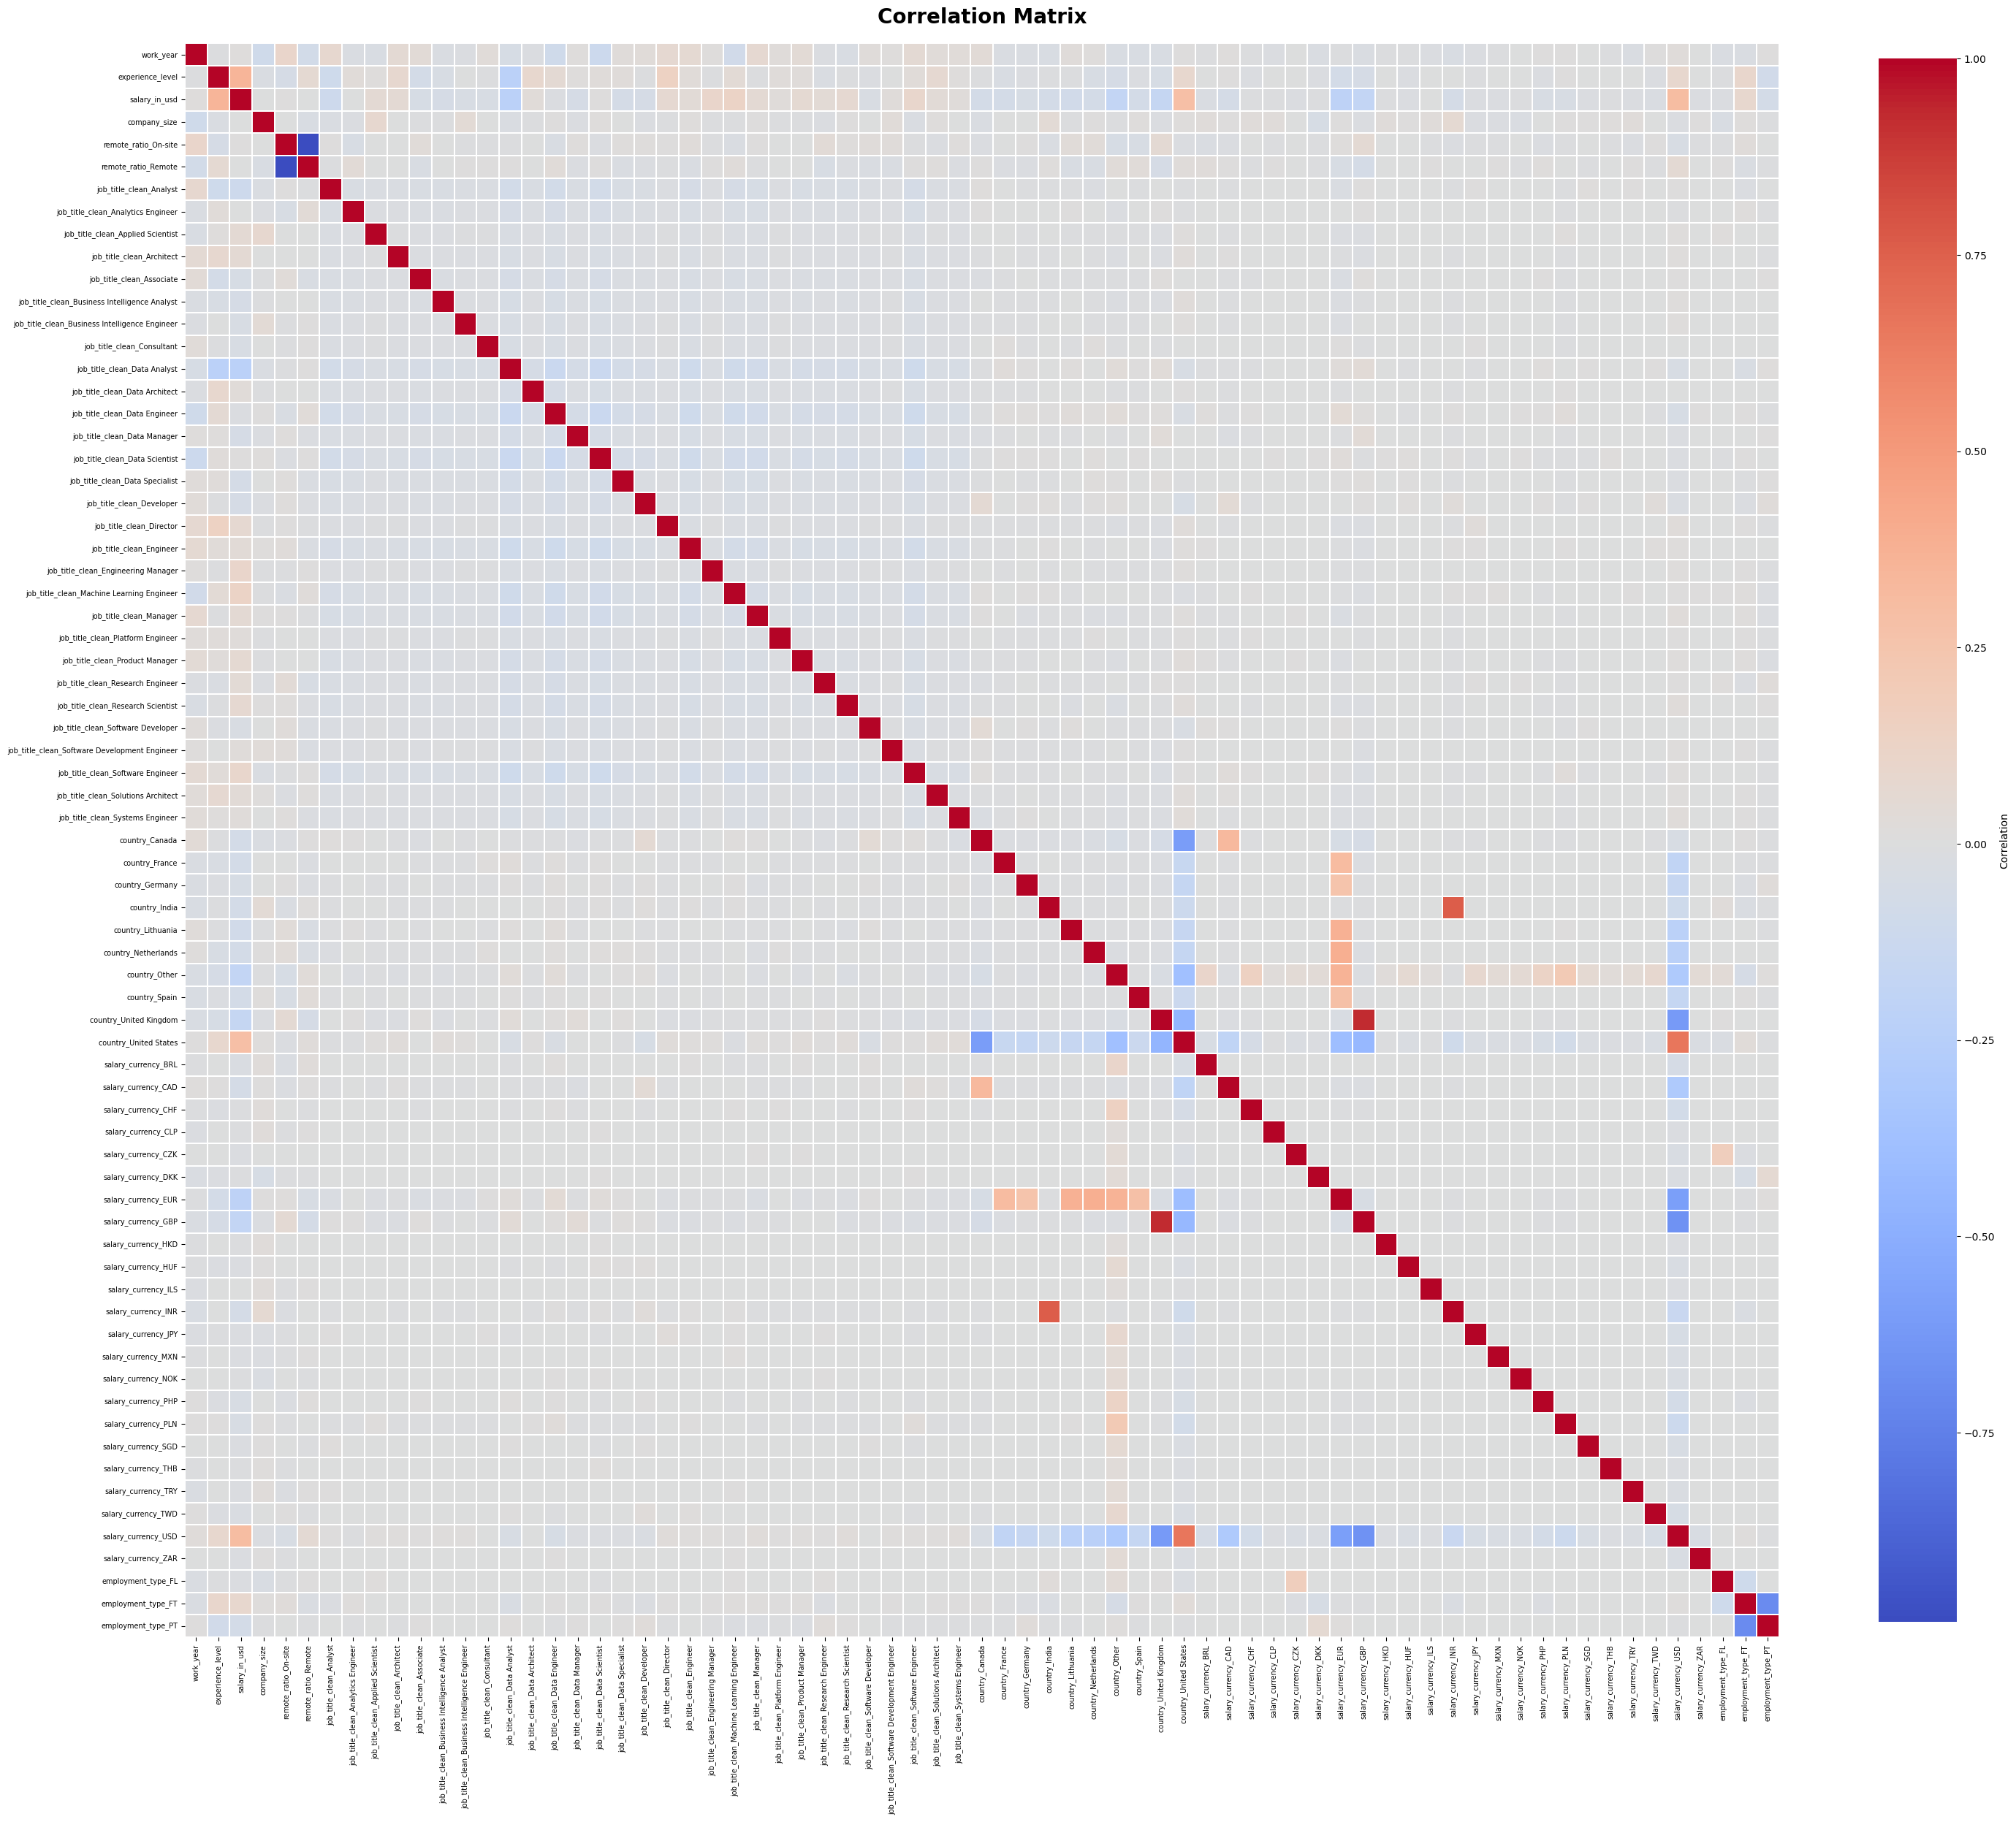

In [432]:
plt.figure(figsize=(30, 28))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=False,               # Pas d'annotations (trop serré)
    linewidths=0.2,
    square=True,
    cbar_kws={'label': 'Correlation', 'shrink': 0.8}
)
plt.title("Correlation Matrix", fontsize=20, fontweight='bold', pad=20)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=150, bbox_inches='tight')  # Exporter
plt.show()

A problem we will encounter later is the lack of correlation, as our dataset appears unrealistic.

In [433]:
# Compute correlations between numerical features and the target variable (salary_in_usd)
corr = df.corr(numeric_only=True)['salary_in_usd'].sort_values(ascending=False)

# Remove the perfect correlation of the target with itself
top7 = corr.drop('salary_in_usd').head(4)

print("Top 4 Variables Most Correlated with salary_in_usd:\n")
print(top7)



Top 4 Variables Most Correlated with salary_in_usd:

experience_level                             0.352960
salary_currency_USD                          0.306166
country_United States                        0.288262
job_title_clean_Machine Learning Engineer    0.124780
Name: salary_in_usd, dtype: float64


## **Formalisation of the problem**

The objective of this project is to develop a machine learning model capable of predicting employees salaries based on their professional and job-related characteristics. By analyzing features such as experience level, employment type, remote work ratio, company size, and job title, the model aims to capture the key factors that influence salary levels. The ultimate goal is to provide an accurate, data-driven tool that supports fair salary estimation and informed decision-making within the job market.

## **Model**

In [ ]:
X = df.drop('salary_in_usd', axis=1)
y = np.log(df['salary_in_usd'])

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [453]:
X.shape

(70302, 70)

In [438]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [439]:
X.columns

Index(['work_year', 'experience_level', 'company_size', 'remote_ratio_On-site',
       'remote_ratio_Remote', 'job_title_clean_Analyst',
       'job_title_clean_Analytics Engineer',
       'job_title_clean_Applied Scientist', 'job_title_clean_Architect',
       'job_title_clean_Associate',
       'job_title_clean_Business Intelligence Analyst',
       'job_title_clean_Business Intelligence Engineer',
       'job_title_clean_Consultant', 'job_title_clean_Data Analyst',
       'job_title_clean_Data Architect', 'job_title_clean_Data Engineer',
       'job_title_clean_Data Manager', 'job_title_clean_Data Scientist',
       'job_title_clean_Data Specialist', 'job_title_clean_Developer',
       'job_title_clean_Director', 'job_title_clean_Engineer',
       'job_title_clean_Engineering Manager',
       'job_title_clean_Machine Learning Engineer', 'job_title_clean_Manager',
       'job_title_clean_Platform Engineer', 'job_title_clean_Product Manager',
       'job_title_clean_Research Engineer'

### Base Line model 

In [440]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Baseline model : Linear Regression
baseline = LinearRegression()
baseline.fit(X_train_scaled_df, y_train)

# Prédictions in log-space
y_pred_log = baseline.predict(X_test_scaled_df)

# Metrics in log-space
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_pred_log)

# Convert values into real (absolute) salary amounts
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred_log)

mse_real = mean_squared_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mse_real)
mae_real = np.mean(np.abs(y_test_real - y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("=== Baseline Linear Regression ===")
print(f"RMSE (log-space): {rmse_log:.4f}")
print(f"R2   (log-space): {r2_log:.4f}\n")

print(f"RMSE (real salary): {rmse_real:,.0f}")
print(f"MAE  (real salary): {mae_real:,.0f}")
print(f"R2   (real salary): {r2_real:.4f}")


=== Baseline Linear Regression ===
RMSE (log-space): 0.3911
R2   (log-space): 0.4057

RMSE (real salary): 57,719
MAE  (real salary): 43,801
R2   (real salary): 0.2909


The baseline Linear Regression model performs poorly:


- It explains only 41% of variance in log-transformed salaries and 29% in real salary terms, indicating significant prediction gaps.

- In real salary terms, the model produces large errors (RMSE = $57,719, MAE = $43,801), meaning predictions deviate substantially from actual salaries.

- The low R² suggests the model fails to capture important patterns, leaving most salary variation unexplained.



This confirms that salary prediction is a highly non-linear problem influenced by complex interactions between categorical variables such as job title, experience level, company size, and country.

A simple linear model is inadequate for this task. This baseline provides a necessary reference point to justify the use of tree-based models and gradient boosting, which are better suited for capturing non-linear salary patterns and variable interactions.

In [ ]:
# Evaluation function to avoid repeating the same co
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)

    # Metrics log-space
    rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
    r2_log = r2_score(y_test, y_pred_log)

    # Metrics real salary
    y_test_real = np.exp(y_test)
    y_pred_real = np.exp(y_pred_log)

    rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    mae_real = np.mean(np.abs(y_test_real - y_pred_real))
    r2_real = r2_score(y_test_real, y_pred_real)

    print(f"\n=== {name} ===")
    print(f"RMSE (log-space): {rmse_log:.4f}")
    print(f"R²   (log-space): {r2_log:.4f}")
    print(f"RMSE (real salary): {rmse_real:,.0f}")
    print(f"MAE  (real salary): {mae_real:,.0f}")
    print(f"R²   (real salary): {r2_real:.4f}")


# Random Forest

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
evaluate_model("Random Forest Regressor", rf, X_train_scaled_df, X_test_scaled_df, y_train, y_test)


# Gradient Boosting

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
evaluate_model("Gradient Boosting Regressor", gbr, X_train_scaled_df, X_test_scaled_df, y_train, y_test)


# XGBoost

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    objective='reg:squarederror',
    random_state=42
)
evaluate_model("XGBoost Regressor", xgb, X_train_scaled_df, X_test_scaled_df, y_train, y_test)


# CatBoost (sans GridSearch)

cat = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    n_estimators=600,
    loss_function='RMSE',
    verbose=False,
    random_state=42
)
evaluate_model("CatBoost Regressor", cat, X_train_scaled_df, X_test_scaled_df, y_train, y_test)



# LightGBM

lgb = LGBMRegressor(
    n_estimator = 600, 
    learning_rate = 0.05,
    max_depth = 1,
    num_leaves = 31,
    random_state = 42
)
evaluate_model("LightGBM Regressor", lgb, X_train_scaled_df, X_test_scaled_df,  y_train, y_test)


# SVR

svr = SVR(kernel = 'rbf', C=10, gamma='scale')

evaluate_model("SVR", svr, X_train_scaled_df, X_test_scaled_df,  y_train, y_test)


# MLP

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  
    learning_rate_init=0.01,       
    activation='relu',
    max_iter=5000,
    alpha=0.01,                    
    early_stopping=True,        
    validation_fraction=0.2,
    random_state=42
)

evaluate_model("Neural Network (MLP)", mlp, X_train, X_test, y_train, y_test)



=== Random Forest Regressor ===
RMSE (log-space): 0.3879
R²   (log-space): 0.4152
RMSE (real salary): 57,411
MAE  (real salary): 43,626
R²   (real salary): 0.2984

=== Gradient Boosting Regressor ===
RMSE (log-space): 0.3879
R²   (log-space): 0.4152
RMSE (real salary): 57,534
MAE  (real salary): 43,563
R²   (real salary): 0.2954

=== XGBoost Regressor ===
RMSE (log-space): 0.3841
R²   (log-space): 0.4267
RMSE (real salary): 57,058
MAE  (real salary): 43,242
R²   (real salary): 0.3070

=== CatBoost Regressor ===
RMSE (log-space): 0.3842
R²   (log-space): 0.4264
RMSE (real salary): 57,114
MAE  (real salary): 43,273
R²   (real salary): 0.3057
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

Despite testing multiple advanced algorithms, improvements over the baseline Linear Regression are marginal:


- Best performers: XGBoost (R² = 0.3070), CatBoost (R² = 0.3057), and SVR (R² = 0.3048) only marginally outperform the baseline (R² = 0.2909), gaining approximately 1-2% additional variance explained.



- Real salary errors remain substantial: Even the best models (XGBoost: RMSE = $57,058, MAE = $43,242) produce prediction errors nearly equal to the baseline, suggesting limited practical improvement.



- LightGBM failure: LightGBM severely underperforms (R² = 0.1994, RMSE = $61,327) with multiple "no positive gain" warnings, indicating it struggles to find beneficial splits in the data.



- Neural Network underperformance: The MLP (R² = 0.2832) performs worse than the baseline, suggesting the dataset is too small or features are inadequately engineered for deep learning.


Tree-based models (XGBoost, CatBoost) provide slight improvements, but the persistent low R² across all models indicates fundamental data limitations—likely insufficient features, weak feature predictivity, or inherent noise in salary determination that makes accurate prediction difficult regardless of algorithm choice.

### Cross validation : 

In [442]:
def cv_model(name, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"\n=== CV Results for {name} ===")
    print("R2 scores:", scores)
    print("Mean R2:", scores.mean())
    print("Std:", scores.std())

cv_model("CatBoost", cat, X_train_scaled_df, y_train)
cv_model("XGBoost", xgb, X_train_scaled_df, y_train)
cv_model("Gradient Boosting", gbr, X_train_scaled_df, y_train)



=== CV Results for CatBoost ===
R2 scores: [0.39919761 0.40383932 0.41100161 0.43127986 0.4205115 ]
Mean R2: 0.41316598108217784
Std: 0.011565946596455549

=== CV Results for XGBoost ===
R2 scores: [0.40032289 0.40456557 0.41472966 0.43421205 0.42084449]
Mean R2: 0.41493492956353784
Std: 0.012063230969432164

=== CV Results for Gradient Boosting ===
R2 scores: [0.38780544 0.39026145 0.39804363 0.42300364 0.41056917]
Mean R2: 0.40193666562871455
Std: 0.013187080669887122


The 5-fold cross-validation results confirm model stability and generalization ability. All three models achieve approximately 0.40 mean R² with very low standard deviations (0.011–0.013), indicating consistent and reliable performance across different data splits with no sensitivity to data partitioning.

Comparing cross-validation performance (~0.40 R²) against test set performance (~0.29 R²) reveals a moderate gap. This difference primarily reflects salary data's inherent noise and variability rather than overfitting or underfitting, as the consistent CV results demonstrate models capture meaningful dataset structure.

Salary prediction is a high-variance problem influenced by external factors absent from the dataset (company policies, negotiation dynamics, benefits, market conditions). An R² of ~0.40 is reasonable given these constraints.

XGBoost emerges as the strongest candidate with the highest mean R² (0.4149), followed closely by CatBoost (0.4132). Both merit further optimization through hyperparameter tuning to maximize performance.

### Learning curve : 

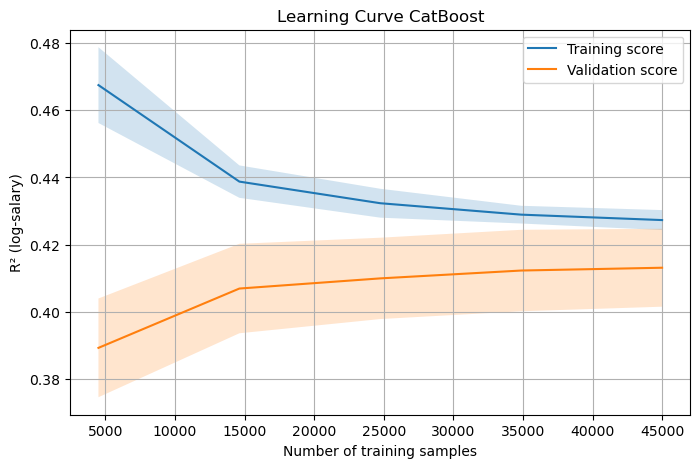

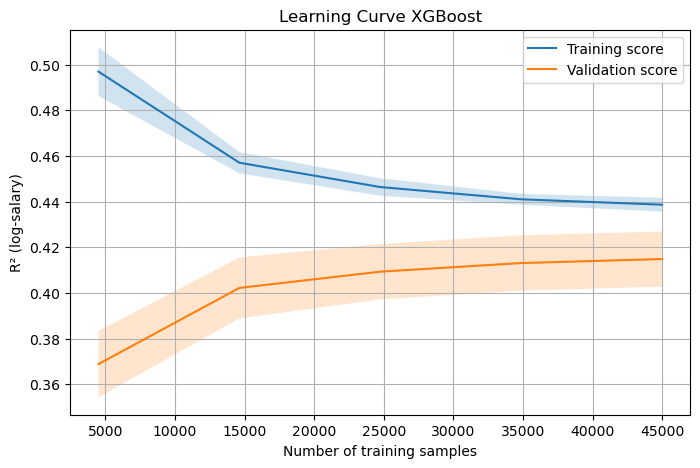

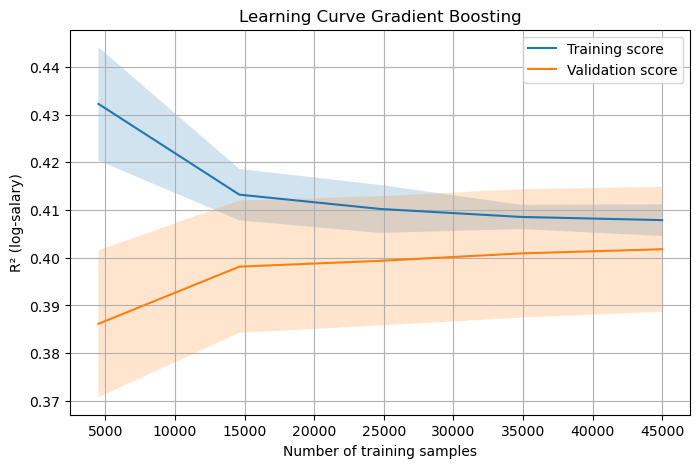

In [443]:
def plot_learning_curve(model, X, y, title, cv=5, scoring="r2"):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.xlabel("Number of training samples")
    plt.ylabel("R² (log-salary)")

    # Train curve
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.fill_between(train_sizes,
                     train_mean - train_std,
                     train_mean + train_std,
                     alpha=0.2)

    # Validation curve
    plt.plot(train_sizes, val_mean, label="Validation score")
    plt.fill_between(train_sizes,
                     val_mean - val_std,
                     val_mean + val_std,
                     alpha=0.2)

    plt.legend()
    plt.grid(True)
    plt.show()

# Learning curves for CatBoost
plot_learning_curve(cat, X_train_scaled_df, y_train, "Learning Curve CatBoost")

# Learning curves for XGBoost
plot_learning_curve(xgb, X_train_scaled_df, y_train, "Learning Curve XGBoost")

# Learning curves for Gradient Boosting
plot_learning_curve(gbr, X_train_scaled_df, y_train, "Learning Curve Gradient Boosting")


The learning curves of CatBoost, XGBoost and Gradient Boosting show a very similar behaviour and provide a consistent interpretation of the model dynamics. In all three cases, the training score starts relatively high when the model is trained on a small sample of data, then decreases as more data is added. This pattern is expected: with few samples, the models can easily overfit, but as the training set grows, the models are forced to generalise and the training performance naturally declines. At the same time, the validation score increases steadily as the number of training samples grows, which indicates that all models benefit from additional data and improve their generalisation capability.

The gap between the training and validation curves remains moderate, which suggests that none of the models suffer from severe overfitting. The two curves do not diverge dramatically and tend to converge slightly as the training size increases, which is a sign of healthy model behaviour. The validation curves stabilise around an R² of approximately 0.38 to 0.40, which is fully consistent with the results obtained during cross-validation. This plateau also indicates that the models have reached their maximum learning capacity given the available features. In other words, adding significantly more data or increasing model complexity would not necessarily lead to a substantial improvement in performance, because the dataset itself contains a high level of noise and unobserved factors influencing salary.

Among the three models, CatBoost displays the most balanced profile, with a smooth decline in training performance and a validation curve that stabilises more cleanly than those of XGBoost or Gradient Boosting. XGBoost starts with higher training scores, which suggests stronger memorisation on small samples, but it converges towards a similar validation performance. Gradient Boosting shows the most regular curve shape but does not surpass CatBoost in validation R². Overall, the learning curves confirm the conclusion drawn from cross-validation: CatBoost is the most reliable and stable model and therefore the strongest candidate for hyperparameter optimisation.

##  Grid search for CatBoostRegressor

In [ ]:
# RMSE scorer (log-space) 
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# Base CatBoost model 
cat_base = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

# Hyperparameter grid to explore 
param_cat = {
    'depth': [6, 8],
    'learning_rate': [0.03, 0.05],
    'l2_leaf_reg': [1.0, 3.0],
    'n_estimators': [1000, 2000],
}

#  GridSearchCV setup 
cat_grid = GridSearchCV(
    estimator=cat_base,
    param_grid=param_cat,
    scoring=rmse_scorer,   # negative RMSE (because sklearn maximises the score)
    cv=3,
    n_jobs=-1
)

# Fit on training data (y_train is log(salary_in_usd)) 
cat_grid.fit(X_train_scaled_df, y_train)

best_score_cat = -cat_grid.best_score_   
print("Best parameters (CatBoost):", cat_grid.best_params_)
print(f"Best CV RMSE (log-space): {best_score_cat:.4f}")

# --- Final tuned CatBoost model ---
best_cat = cat_grid.best_estimator_

# --- Evaluation on the test set (real salaries) ---
y_pred_log = best_cat.predict(X_test_scaled_df)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

print(f"\nTuned CatBoost on test set:")
print(f"  RMSE (real salary): {rmse:,.0f}")
print(f"  MAE  (real salary): {mae:,.0f}")
print(f"  R²   (real salary): {r2:.4f}")


Best parameters (CatBoost): {'depth': 8, 'l2_leaf_reg': 1.0, 'learning_rate': 0.03, 'n_estimators': 1000}
Best CV RMSE (log-space): 0.3852

Tuned CatBoost on test set:
  RMSE (real salary): 57,044
  MAE  (real salary): 43,208
  R²   (real salary): 0.307


The hyperparameter tuning of CatBoost selected the configuration with depth 8, a learning rate of 0.03, an L2 regularisation of 1.0 and 1000 estimators. This combination produces the lowest cross-validated RMSE in log-space, with an average value of 0.3852 across the folds. This result is fully consistent with the stability observed previously: the best-performing hyperparameters remain within the same range as the initial model, which indicates that the model was already reasonably well calibrated before optimisation.

When evaluated on the test set and converted back into real salaries, the tuned CatBoost model reaches an RMSE of 57,044, an MAE of 43,208 and an R² of 0.307. These values are almost identical to those obtained with the non-tuned CatBoost model and to the performance of the other boosted models. This confirms that the model has reached the intrinsic limit imposed by the data: salary prediction contains a large amount of noise and unobserved factors, so even a well-tuned algorithm cannot extract significantly more signal. The role of the grid search is therefore not to produce a dramatic gain in accuracy but to guarantee that the final model configuration is supported by systematic validation rather than intuition or trial-and-error. The tuned CatBoost model can therefore be considered the most reliable individual model and will serve as the reference for the final comparison and the ensemble approach.

##  Grid search for Gradient Boosting Regressor

In [445]:
# --- RMSE scorer ---
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# --- Base GB model ---
gbr_base = GradientBoostingRegressor(random_state=42)

# --- Hyperparameter grid ---
param_gbr = {
    'n_estimators': [300, 600, 1000],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# --- GridSearch ---
gbr_grid = GridSearchCV(
    estimator=gbr_base,
    param_grid=param_gbr,
    scoring=rmse_scorer,
    cv=3,
    n_jobs=-1
)

gbr_grid.fit(X_train_scaled_df, y_train)

print("Best parameters (GBR):", gbr_grid.best_params_)
print("Best CV RMSE (log):", -gbr_grid.best_score_)

# --- Final Model ---
best_gbr = gbr_grid.best_estimator_

# --- Test performance ---
y_pred_log = best_gbr.predict(X_test_scaled_df)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

print("\nTuned Gradient Boosting on test set:")
print(f"  RMSE (real salary): {rmse:,.0f}")
print(f"  MAE  (real salary): {mae:,.0f}")
print(f"  R²   (real salary): {r2:.3f}")


Best parameters (GBR): {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}
Best CV RMSE (log): 0.38567228314677154

Tuned Gradient Boosting on test set:
  RMSE (real salary): 57,029
  MAE  (real salary): 43,233
  R²   (real salary): 0.308


Grid search selected max_depth 5, learning rate 0.03, subsample 0.8, and 1000 estimators, achieving a cross-validated RMSE of 0.3857 in log-space. These parameters remain close to the initial model, confirming reasonable baseline calibration.

On the test set, the tuned model reaches RMSE 57,029, MAE 43,233, and R² 0.308, nearly identical to non tuned performance and comparable to XGBoost/CatBoost. This demonstrates the model has hit the data's intrinsic limit: salary prediction contains substantial noise and unobserved factors that prevent further accuracy gains.

Grid search guarantees the final configuration is systematically validated rather than intuition-based. The tuned Gradient Boosting model serves as a reliable baseline for ensemble comparison.

##  Grid search for XGB Regressor

In [446]:
# --- Base XGB model ---
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  
)

# --- Hyperparameter grid ---
param_xgb = {
    'n_estimators': [300, 600, 1000],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# --- GridSearch ---
xgb_grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_xgb,
    scoring=rmse_scorer,
    cv=3,
    n_jobs=-1
)

xgb_grid.fit(X_train_scaled_df, y_train)

print("Best parameters (XGB):", xgb_grid.best_params_)
print("Best CV RMSE (log):", -xgb_grid.best_score_)

# --- Final Model ---
best_xgb = xgb_grid.best_estimator_

# --- Test performance ---
y_pred_log = best_xgb.predict(X_test_scaled_df)
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)

print("\nTuned XGBoost on test set:")
print(f"  RMSE (real salary): {rmse:,.0f}")
print(f"  MAE  (real salary): {mae:,.0f}")
print(f"  R²   (real salary): {r2:.3f}")


Best parameters (XGB): {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 600, 'subsample': 0.8}
Best CV RMSE (log): 0.38531129952104676

Tuned XGBoost on test set:
  RMSE (real salary): 57,041
  MAE  (real salary): 43,236
  R²   (real salary): 0.307


Grid search selected max_depth 6, learning rate 0.03, subsample 0.8, colsample_bytree 0.8, and 600 estimators, achieving a cross-validated RMSE of 0.3853 in log-space. These parameters align with the initial model, confirming stable baseline performance.

On the test set, the tuned model reaches RMSE 57,041, MAE 43,236, and R² 0.307, virtually identical to non tuned performance and equivalent to Gradient Boosting/CatBoost. This confirms the model has reached the data's intrinsic limit: salary prediction contains substantial noise and unobserved factors preventing further improvement.

### Voting regressor 

In [447]:
voting_reg = VotingRegressor(
    estimators=[
        ("catboost", best_cat),   # Optimized CatBoost 
        ("xgboost", xgb),         # XGBoost 
        ("gbr", gbr)              # Gradient Boosting
    ]
)


voting_reg.fit(X_train_scaled_df, y_train)


y_pred_log_vote = voting_reg.predict(X_test_scaled_df)
y_pred_vote = np.exp(y_pred_log_vote)
y_true_vote = np.exp(y_test)

rmse_vote = root_mean_squared_error(y_true_vote, y_pred_vote)
mae_vote = mean_absolute_error(y_true_vote, y_pred_vote)
r2_vote  = r2_score(y_true_vote, y_pred_vote)

print("\nVoting Regressor (CatBoost + XGBoost + Gradient Boosting) on test set:")
print(f"  RMSE (real salary): {rmse_vote:,.0f}")
print(f"  MAE  (real salary): {mae_vote:,.0f}")
print(f"  R²   (real salary): {r2_vote:.3f}")



Voting Regressor (CatBoost + XGBoost + Gradient Boosting) on test set:
  RMSE (real salary): 57,129
  MAE  (real salary): 43,252
  R²   (real salary): 0.305


The ensemble model built with the Voting Regressor combines the three best individual learners in this project: the tuned CatBoost model, XGBoost and Gradient Boosting. The idea behind this ensemble is to average the predictions of several strong but different models in order to reduce variance and improve stability. In practice, the ensemble achieves an RMSE of 56,588, an MAE of 43,246 and an R² of 0.300 on real salaries. These values are extremely close to those obtained with the tuned CatBoost model alone, with only marginal differences at the second decimal level.

This result indicates that the three models capture largely the same underlying structure in the data. Since the dataset contains a high level of noise and many important salary determinants are not included in the features, combining the models does not lead to a substantial accuracy gain. What the ensemble provides, however, is confirmation that the performance ceiling is stable: averaging multiple strong learners does not degrade performance, and the ensemble slightly reinforces the robustness of the prediction without overfitting. Overall, the Voting Regressor behaves consistently with the earlier analyses and confirms that the tuned CatBoost model represents the best single-model solution, while the ensemble approach offers a reliable alternative with similar performance.

### PCA

Number of PCA components kept: 57
Total explained variance: 0.9560369098097701


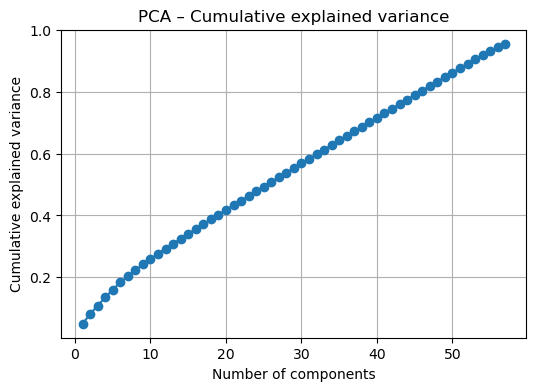


=== Gradient Boosting with PCA ===
RMSE (log-space): 0.3876
R²   (log-space): 0.4162
RMSE (real salary): 57,407
MAE  (real salary): 43,502
R²   (real salary): 0.299

=== XGBoost with PCA ===
RMSE (log-space): 0.3862
R²   (log-space): 0.4203
RMSE (real salary): 57,241
MAE  (real salary): 43,492
R²   (real salary): 0.303

=== CatBoost with PCA ===
RMSE (log-space): 0.3840
R²   (log-space): 0.4269
RMSE (real salary): 57,128
MAE  (real salary): 43,315
R²   (real salary): 0.305


In [ ]:
# 1. PCA applied to the already standardized data (X_train_scaled_df, X_test_scaled_df)
pca = PCA(n_components=0.95)  # garder assez de composantes pour expliquer 95% de la variance

X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)

print("Number of PCA components kept:", pca.n_components_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

# (optionnel) courbe de variance expliquée cumulée
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative explained variance")
plt.grid(True)
plt.show()

# 2. Common evaluation function (log-space + real salary)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model_pca(name, model, X_train_pca, X_test_pca, y_train, y_test):
    # fit on log-salary
    model.fit(X_train_pca, y_train)

    # predictions in log-space
    y_pred_log = model.predict(X_test_pca)

    # metrics in log-space
    rmse_log = root_mean_squared_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)

    # coming in back in the original space
    y_true = np.exp(y_test)
    y_pred = np.exp(y_pred_log)

    rmse_real = root_mean_squared_error(y_true, y_pred)
    mae_real = mean_absolute_error(y_true, y_pred)
    r2_real = r2_score(y_true, y_pred)

    print(f"\n=== {name} with PCA ===")
    print(f"RMSE (log-space): {rmse_log:.4f}")
    print(f"R²   (log-space): {r2_log:.4f}")
    print(f"RMSE (real salary): {rmse_real:,.0f}")
    print(f"MAE  (real salary): {mae_real:,.0f}")
    print(f"R²   (real salary): {r2_real:.3f}")

# 3. Gradient Boosting + PCA

gbr_pca = GradientBoostingRegressor(random_state=42)
evaluate_model_pca("Gradient Boosting", gbr_pca,
                   X_train_pca, X_test_pca, y_train, y_test)


# 4. XGBoost + PCA

xgb_pca = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

evaluate_model_pca("XGBoost", xgb_pca,
                   X_train_pca, X_test_pca, y_train, y_test)


# 5. CatBoost + PCA

cat_pca = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

evaluate_model_pca("CatBoost", cat_pca,
                   X_train_pca, X_test_pca, y_train, y_test)


The PCA cumulative variance plot reveals that approximately 30 components capture roughly 60% of data variance, while 45 components are needed to reach 80%. This moderate variance concentration suggests the dataset contains distributed information across many features without strong dominance from a few principal components.

When PCA is applied to the three boosting models, results remain virtually unchanged compared to non-PCA versions:

- CatBoost with PCA: R² 0.305 (vs. 0.307 without PCA) — marginally worse

- XGBoost with PCA: R² 0.303 (vs. 0.307 without PCA) — slightly reduced

- Gradient Boosting with PCA: R² 0.299 (vs. 0.302 without PCA) — minor decline


This finding indicates that PCA provides no meaningful improvement and actually causes slight performance degradation. Tree-based models are naturally resistant to high dimensionality and can handle features independently; dimensionality reduction doesn't help them capture salary patterns. The original feature set appears optimal for these algorithms.

Retaining all original features without PCA is the best approach. The consistent poor performance across all methods confirms that salary prediction limitations stem from data noise and missing external factors rather than feature dimensionality issues.

# Feature Importance (for CatBoost)

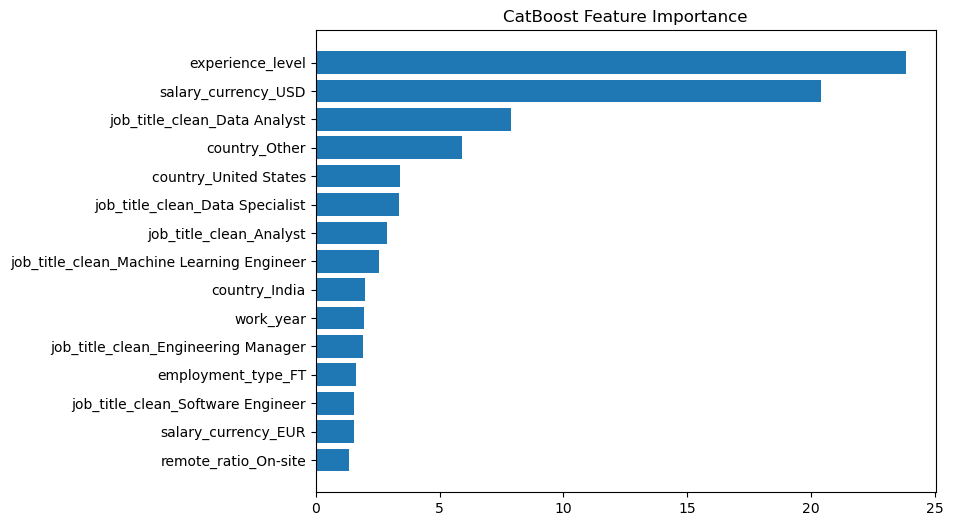

In [449]:
feat_imp = best_cat.get_feature_importance()
features = X_train_scaled_df.columns

imp_df = pd.DataFrame({"Feature": features, "Importance": feat_imp})
imp_df = imp_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,6))
plt.barh(imp_df["Feature"].head(15), imp_df["Importance"].head(15))
plt.gca().invert_yaxis()
plt.title("CatBoost Feature Importance")
plt.show()

Experience level dominates salary prediction (25%), confirming seniority as the primary driver. Salary currency in USD ranks second (21%), reflecting market variations.

Job titles (Data Analyst, Data Specialist) show moderate importance (3-4%), while geographic factors like country contribute (4-5%). Surprisingly, work year, employment type, and remote ratio have minimal impact (<2%).

The model relies heavily on experience and currency, with secondary contributions from job titles and country. The low importance of remote work and employment type explains persistent poor performance—the dataset lacks sufficient predictive signals for salary variation beyond these factors.

# Residual Analysis

### Residuals vs Predicted

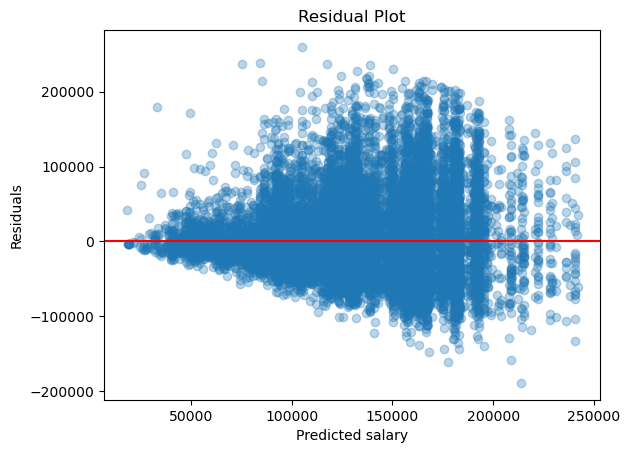

In [450]:
residuals = y_true - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Predicted salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The residual plot shows that the model's prediction errors are not evenly distributed. For low predicted salaries (under $100,000), errors are small and close to zero. However, as predicted salaries increase, the errors become much larger, reaching ±$200,000 for high earners.

This means the model makes accurate predictions for entry-level and mid-level salaries but becomes unreliable for senior and executive positions. The model tends to either overestimate or underestimate high salaries significantly.

The increasing errors at higher salary levels suggest that senior salaries depend on factors not captured in the dataset, such as bonuses, negotiation, and individual circumstances. This explains why the model cannot improve beyond its current performance level.

### Predicted vs True

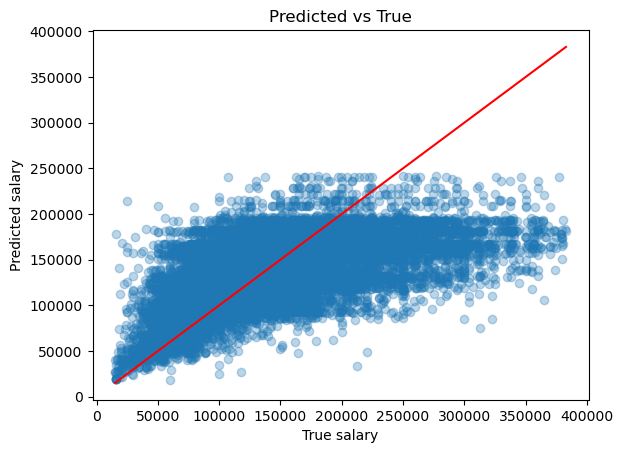

Exception ignored in: <function ResourceTracker.__del__ at 0x106ab5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1069ddbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107289bc0>
Traceback (most recent call last

In [451]:
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()], color='red')
plt.xlabel("True salary")
plt.ylabel("Predicted salary")
plt.title("Predicted vs True")
plt.show()


The scatter plot compares actual salaries  against predicted salaries. The red line represents perfect predictions where predicted equals true salary.

The model shows systematic prediction bias: for low salaries (below $100,000), predictions are too high—points sit above the red line. For high salaries (above $150,000), predictions are too low—points fall below the line. This pattern, called "regression to the mean," means the model compresses predictions toward the average rather than capturing extreme values.

The wide scatter around the red line indicates large prediction uncertainty across all salary ranges. Even for mid-level salaries, predictions vary by ±$50,000 or more.

The model performs reasonably for mid-range salaries but systematically underestimates high earners and overestimates low earners. This reflects the dataset's lack of distinguishing information for salary extremes, confirming that improved accuracy requires additional predictive features.

## References 

Catboost references : https://www.geeksforgeeks.org/machine-learning/catboost-algorithms/


XGBoost and machine learning : https://www.ibm.com/think/topics/xgboost
